In [37]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

def restricao1(n):
  """Restrição de n >= 0"""
  penalidade = 10e12
  # n >= 1 => n - 1 >= 0 => -n + 1 <= 0

  return penalidade * (max([0, -n + 1.0])**2)

def restricao2(r):
  """Restrição de v <= vc"""
  vc = 20.0
  penalty = 10e12
  g, m, kc, t = 9.8, 100.0, 10.5, 250.0

  function = "((g*m) / (kc * 2.0 * pi * (r**2.0))) * (1.0 - e**-(((kc * 2.0 * pi * (r**2.0)) / m) * t)) - vc"

  return penalty * (max([0, eval(function, {"__builtins__": {}, "r": r, "vc": vc, "g": g, "m": m, "kc": kc, "t": t}, ALLOWED_NAMES)])**2)

def custo(lmbda, constantes, x, d):
  """Função que representa o custo para se fabricar os paraquedas."""
  [c0, c1, c2] = constantes
  [n, r] = x
  [d1, d2] = d

  n = n + lmbda * d1
  r = r + lmbda * d2

  penalidade1 = restricao1(n)
  # penalidade2 = restricao2(lmbda)

  return n * (c0 + c1*(np.sqrt(2)*r) + c2*(2*np.pi*(r**2))**2) + penalidade1

def goldenSectionSearch (intervalo, constantes, x, d):
  """Função que faz uma busca unidimensional, usando o algoritmo da Seção Áurea"""

  [a, b] = intervalo
  razaoAurea = (5**(1/2) - 1) / (2)
  e = 1e-6
  time = 0
  timeout = 100
  xa, xb = 0, 0

  while time < timeout:
    p = razaoAurea * (b - a)
    xa = a + p
    xb = b - p
    fxa = custo(xa, constantes, x, d)
    fxb = custo(xb, constantes, x, d)

    if math.fabs(xb - xa) < e:
      break

    if fxa >= fxb:
      b = xa
    elif fxb > fxa:
      a = xb

    time += 1

  print(f"Iterações Golden Section: {time}")
  
  return xa

In [38]:
def plot3D(min, constantes, range=5):
    [c0, c1, c2] = constantes
    """Função que plota um gráfico 3D da superfície que representa a função custo."""
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'Função Custo do Paraquedas', fontsize=10)
    ax.set_xlabel("n")
    ax.set_ylabel("r")
    n = np.arange(-range, range, 0.15)
    r = np.arange(-range, range, 0.15)
    n, r = np.meshgrid(n, r)
    z = n * (c0 + c1*(np.sqrt(2)*r) + c2*(2*np.pi*(r**2))**2)

    ax.plot_surface(n, r, z, rstride=1, cstride=1, cmap='viridis')
    
    ax.scatter(min[0], min[1], min[0] * (c0 + c1*(np.sqrt(2)*min[1]) + c2*(2*np.pi*(min[1]**2))**2), color='red')

def plotContour(min, constantes, range=5):
    """Função que plota as curvas de nível da superfície que representa a função custo."""
    [c0, c1, c2] = constantes
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'Contorno Função Custo do Paraquedas', fontsize=10)
    ax.set_xlabel("n")
    ax.set_ylabel("r")
    n = np.arange(-range, range, 0.15)
    r = np.arange(-range, range, 0.15)
    n, r = np.meshgrid(n, r)
    z = n * (c0 + c1*(np.sqrt(2)*r) + c2*(2*np.pi*(r**2))**2)

    # Contorno da função
    ax.contour(n, r, z, colors='blue')

    # Ponto de mínimo encontrado
    ax.scatter(min[0], min[1], color='red')

    plt.show()



Iteração 0==========================
Início: [0. 3.]
Iterações Golden Section: 33
Busca [1. 0.]: ponto ótimo: 1.0000013587029084 => novo ponto: [1.0000013587029084, 3.0]
Iterações Golden Section: 32
Busca [0. 1.]: ponto ótimo: -3.207666452376217 => novo ponto: [1.0000013587029084, -0.20766645237621706]
Iterações Golden Section: 32
Busca [1.0000013587029084,-3.207666452376217]: ponto ótimo: -3.462010993458711e-07 => novo ponto: [1.0000010125013388, -0.20766534187856492]

Iteração 1==========================
Início: [ 1.00000136 -0.20766645]
Iterações Golden Section: 32
Busca [1. 0.]: ponto ótimo: 5.237748767119726e-09 => novo ponto: [1.0000010177390874, -0.20766534187856492]
Iterações Golden Section: 33
Busca [0. 1.]: ponto ótimo: 2.4397532182730837e-07 => novo ponto: [1.0000010177390874, -0.20766509790324308]
Iterações Golden Section: 32
[1.0000000000001135, -0.20766105495249576]


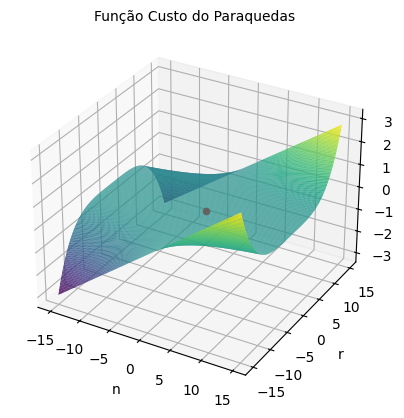

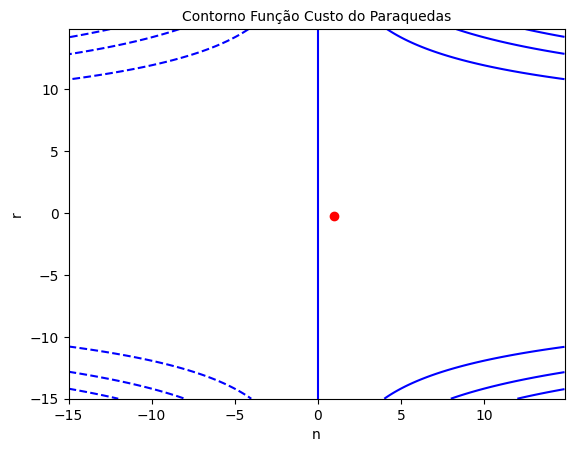

In [39]:
def hookeJeeves(valorInicial, constantes, dimensao):
    """Função que implementa o método de busca multivariável Hooke Jeeves."""
    n, r = valorInicial[0], valorInicial[1]
    d = np.array(
        [[1.0,0.0], 
        [0.0,1.0]]
    )

    e = 1e-2
    k = 0
    timeout = 100
    time = 0
    novoPonto = np.array([0.0, 0.0])
    pontoInicial = np.copy([n, r])
    
    while time < timeout:
           
        print(f'\nIteração {time}==========================')
        print(f'Início: {pontoInicial}')
        
        for k in range(dimensao):          
            d1, d2 = d[k][0], d[k][1]

            intervalo = [-10.0 + n if k == 0 else -10.0 + r, 10.0 + n if k == 1 else 10.0 + r]

            lmbda = goldenSectionSearch(intervalo, constantes, [n, r], [d1, d2])

            n, r = n + lmbda * d1, r + lmbda * d2

            print(f'Busca {d[k]}: ponto ótimo: {lmbda} => novo ponto: [{n}, {r}]')
        
        novoPonto = np.array([n, r])

        direcaoPrincip = novoPonto - pontoInicial

        d1, d2 = direcaoPrincip[0], direcaoPrincip[1]

        intervalo = [-10.0 + n , 10.0 + r]
        lmbda = goldenSectionSearch(intervalo, constantes, [n, r], [d1, d2])

        n, r = n + lmbda * d1, r + lmbda * d2

        if LA.norm([n, r] - pontoInicial) < e:
            break

        print(f'Busca [{d1},{d2}]: ponto ótimo: {lmbda} => novo ponto: [{n}, {r}]')

        pontoInicial = novoPonto
        
        time += 1

    return [n, r]

valorInicial = np.array([0, 3.0])
constantes = [1.0, 1.0, 1.0]
min = hookeJeeves(valorInicial, constantes, 2)

print(min)

plot3D(min, constantes, 15)
plotContour(min, constantes, 15)